# import libraries

In [7]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import glob
import matplotlib.gridspec
import scipy.ndimage

import wrf
import netCDF4
import cmocean

import pandas

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy
import cartopy.io.shapereader

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [8]:
run_info = 'FMAASO'
skip_time=0

# opening mean fields

## control data

In [9]:
!ls /beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/

001			001_MYNN25_scheme	  001_UW_scheme
001_ACM2_scheme		001_MYNN30_scheme	  001_UW_scheme_10days
001_ACM2_scheme_10days	001_MYNN30_scheme_10days  001_with_extras
001_MYJ_scheme		001_TEMF_scheme		  001_with_xkzs
001_MYJ_scheme_10days	001_TEMF_scheme_10days	  001_with_xkzs_and_fxpbls


In [10]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_with_extras'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*'))
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [11]:
ptot_400 = wrf.getvar(ds_list, 'p', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ptot_400_sensitivity.npy', ptot_400)

geopot_400 = wrf.getvar(ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_geopot_400_sensitivity.npy', geopot_400)

tk_400 = wrf.getvar(ds_list, 'tk', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_tk_400_sensitivity.npy', tk_400)

ua_400 = wrf.getvar(ds_list, 'ua', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ua_400_sensitivity.npy', ua_400)

va_400 = wrf.getvar(ds_list, 'va', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_va_400_sensitivity.npy', va_400)

In [12]:
ptot_400 = numpy.load('DATA_ptot_400_sensitivity.npy')
geopot_400 = numpy.load('DATA_geopot_400_sensitivity.npy')
tk_400 = numpy.load('DATA_tk_400_sensitivity.npy')
ua_400 = numpy.load('DATA_ua_400_sensitivity.npy')
va_400 = numpy.load('DATA_va_400_sensitivity.npy')

In [13]:
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*')

In [14]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

In [15]:
qvapor_400 = cont_mfds['QVAPOR'].values
u_400 = cont_mfds['U'].values
v_400 = cont_mfds['V'].values
w_400 = cont_mfds['W'].values
t_400 = cont_mfds['T'].values

In [16]:
pblh_400 = cont_mfds['PBLH'].values

In [17]:
rainc_400 = cont_mfds['RAINC']
rainnc_400 = cont_mfds['RAINNC']

In [18]:
rqvcuten_400 = cont_mfds['RQVCUTEN'].values
rucuten_400 = cont_mfds['RUCUTEN'].values
rvcuten_400 = cont_mfds['RVCUTEN'].values
rthcuten_400 = cont_mfds['RTHCUTEN'].values

rqvblten_400 = cont_mfds['RQVBLTEN'].values
rublten_400 = cont_mfds['RUBLTEN'].values
rvblten_400 = cont_mfds['RVBLTEN'].values
rthblten_400 = cont_mfds['RTHBLTEN'].values

In [19]:
xkzq3d_400 = cont_mfds['XKZQ3D'].values
xkzh3d_400 = cont_mfds['XKZH3D'].values
xkzm3d_400 = cont_mfds['XKZM3D'].values

In [20]:
hfxpbl2d_400 = cont_mfds['HFXPBL2D'].values
qfxpbl2d_400 = cont_mfds['QFXPBL2D'].values
ufxpbl2d_400 = cont_mfds['UFXPBL2D'].values
vfxpbl2d_400 = cont_mfds['VFXPBL2D'].values
bfxpbl2d_400 = cont_mfds['BFXPBL2D'].values
we2d_400 = cont_mfds['WE2D'].values

In [21]:
deltaysu_400 = cont_mfds['DELTA_YSU'].values

In [22]:
qfx_400 = cont_mfds['QFX'].values
hfx_400 = cont_mfds['HFX'].values

In [23]:
hgamq2d_400 = cont_mfds['HGAMQ2D'].values
hgamt2d_400 = cont_mfds['HGAMT2D'].values

In [ ]:
ri3d_400 = cont_mfds['RI3D'].values

## phys data

In [ ]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_with_extras'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*'))
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [ ]:
ptot_1000 = wrf.getvar(ds_list, 'p', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ptot_1000_sensitivity.npy', ptot_1000)

geopot_1000 = wrf.getvar(ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_geopot_1000_sensitivity.npy', geopot_1000)

tk_1000 = wrf.getvar(ds_list, 'tk', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_tk_1000_sensitivity.npy', tk_1000)

ua_1000 = wrf.getvar(ds_list, 'ua', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ua_1000_sensitivity.npy', ua_1000)

va_1000 = wrf.getvar(ds_list, 'va', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_va_1000_sensitivity.npy', va_1000)

In [ ]:
ptot_1000 = numpy.load('DATA_ptot_1000_sensitivity.npy')
geopot_1000 = numpy.load('DATA_geopot_1000_sensitivity.npy')
tk_1000 = numpy.load('DATA_tk_1000_sensitivity.npy')
ua_1000 = numpy.load('DATA_ua_1000_sensitivity.npy')
va_1000 = numpy.load('DATA_va_1000_sensitivity.npy')

In [ ]:
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*')

In [ ]:
qvapor_1000 = phys_mfds['QVAPOR'].values
u_1000 = phys_mfds['U'].values
v_1000 = phys_mfds['V'].values
w_1000 = phys_mfds['W'].values
t_1000 = phys_mfds['T'].values

In [ ]:
pblh_1000 = phys_mfds['PBLH'].values

In [ ]:
rainc_1000 = phys_mfds['RAINC']
rainnc_1000 = phys_mfds['RAINNC']

In [ ]:
rqvcuten_1000 = phys_mfds['RQVCUTEN'].values
rucuten_1000 = phys_mfds['RUCUTEN'].values
rvcuten_1000 = phys_mfds['RVCUTEN'].values
rthcuten_1000 = phys_mfds['RTHCUTEN'].values

rqvblten_1000 = phys_mfds['RQVBLTEN'].values
rublten_1000 = phys_mfds['RUBLTEN'].values
rvblten_1000 = phys_mfds['RVBLTEN'].values
rthblten_1000 = phys_mfds['RTHBLTEN'].values

In [ ]:
xkzq3d_1000 = phys_mfds['XKZQ3D'].values
xkzh3d_1000 = phys_mfds['XKZH3D'].values
xkzm3d_1000 = phys_mfds['XKZM3D'].values

In [ ]:
hfxpbl2d_1000 = phys_mfds['HFXPBL2D'].values
qfxpbl2d_1000 = phys_mfds['QFXPBL2D'].values
ufxpbl2d_1000 = phys_mfds['UFXPBL2D'].values
vfxpbl2d_1000 = phys_mfds['VFXPBL2D'].values
bfxpbl2d_1000 = phys_mfds['BFXPBL2D'].values
we2d_1000 = phys_mfds['WE2D'].values

In [ ]:
deltaysu_1000 = phys_mfds['DELTA_YSU'].values

In [ ]:
qfx_1000 = phys_mfds['QFX'].values
hfx_1000 = phys_mfds['HFX'].values

In [ ]:
hgamq2d_1000 = phys_mfds['HGAMQ2D'].values
hgamt2d_1000 = phys_mfds['HGAMT2D'].values

In [ ]:
ri3d_1000 = phys_mfds['RI3D'].values

## define dx, dy

In [ ]:
dx = 50000. # 50,000 m or 50 km
dy = 50000.

# constants

In [ ]:
L_v = 2264705.0 # J/kg
c_p = 1005.7 # J/kgK
g = 9.80665 # m/s2

## get landmask

In [ ]:
landmask = cont_mfds['LANDMASK'].sel(Time=0).values

In [ ]:
mp.contourf(landmask);mp.colorbar()

# calculate MSE

In [ ]:
mse_400 = geopot_400 + L_v*qvapor_400 + c_p*tk_400
mse_1000 = geopot_1000 + L_v*qvapor_1000 + c_p*tk_1000

numpy.save('DATA_mse_400_sensitivity.npy', mse_400)
numpy.save('DATA_mse_1000_sensitivity.npy', mse_1000)

In [ ]:
mse_400 = numpy.load('DATA_mse_400_sensitivity.npy')
mse_1000 = numpy.load('DATA_mse_1000_sensitivity.npy')

set up time/lev numbers

In [ ]:
ntime = 25
nlev = 29

# calculate dtheta/dt for full, cu, and pbl schemes

In [ ]:
dthetadt_400 = numpy.zeros(t_400.shape)*numpy.nan
dthetadt_1000 = numpy.zeros(t_1000.shape)*numpy.nan

In [ ]:
for t in range(1,ntime-1):
    dthetadt_400[t,:,:,:] = (t_400[t+1,:,:,:]-t_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dthetadt_1000[t,:,:,:] = (t_1000[t+1,:,:,:]-t_1000[t-1,:,:,:])/7200.

# dqvapor/dt for full, cu, and pbl schemes

In [ ]:
dqdt_400 = numpy.zeros(qvapor_400.shape)*numpy.nan
dqdt_1000 = numpy.zeros(qvapor_1000.shape)*numpy.nan

In [ ]:
for t in range(1,ntime-1):
    dqdt_400[t,:,:,:] = (qvapor_400[t+1,:,:,:]-qvapor_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dqdt_1000[t,:,:,:] = (qvapor_1000[t+1,:,:,:]-qvapor_1000[t-1,:,:,:])/7200.

# duadt

In [ ]:
duadt_400 = numpy.zeros(ua_400.shape)*numpy.nan
duadt_1000 = numpy.zeros(ua_1000.shape)*numpy.nan

In [ ]:
for t in range(1,ntime-1):
    duadt_400[t,:,:,:] = (ua_400[t+1,:,:,:]-ua_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    duadt_1000[t,:,:,:] = (ua_1000[t+1,:,:,:]-ua_1000[t-1,:,:,:])/7200.

# dvadt

In [ ]:
dvadt_400 = numpy.zeros(va_400.shape)*numpy.nan
dvadt_1000 = numpy.zeros(va_1000.shape)*numpy.nan

In [ ]:
for t in range(1,ntime-1):
    dvadt_400[t,:,:,:] = (va_400[t+1,:,:,:]-va_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dvadt_1000[t,:,:,:] = (va_1000[t+1,:,:,:]-va_1000[t-1,:,:,:])/7200.

# dmse/dt

In [ ]:
dmsedt_400 = numpy.zeros((ntime,nlev,xlat.shape[0],xlat.shape[1]))*numpy.nan
dmsedt_1000 = numpy.zeros((ntime,nlev,xlat.shape[0],xlat.shape[1]))*numpy.nan

In [ ]:
for t in range(1,ntime-1):
    dmsedt_400[t,:,:,:] = (mse_400[t+1,:,:,:]-mse_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dmsedt_1000[t,:,:,:] = (mse_1000[t+1,:,:,:]-mse_1000[t-1,:,:,:])/7200.

calculate lat lon stuff

In [ ]:
dry_lon_lo, dry_lon_hi, dry_lat_lo, dry_lat_hi = -60,-50,-10,10
wet_lon_lo, wet_lon_hi, wet_lat_lo, wet_lat_hi = -80,-75,-10,10

dry_lon_lo_degE = 360+dry_lon_lo
dry_lon_hi_degE = 360+dry_lon_hi

wet_lon_lo_degE = 360+wet_lon_lo
wet_lon_hi_degE = 360+wet_lon_hi

In [ ]:
lon_lo = dry_lon_lo
lon_hi = dry_lon_hi
lat_lo = dry_lat_lo
lat_hi = dry_lat_hi

# lon_lo = wet_lon_lo
# lon_hi = wet_lon_hi
# lat_lo = wet_lat_lo
# lat_hi = wet_lat_hi

In [ ]:
landmask_indices = numpy.copy(landmask)
landmask_indices[landmask==1]=1
landmask_indices[landmask!=1]=0
landmask_indices = numpy.array(landmask_indices, dtype=bool)

In [ ]:
lon_indices = (xlong>=lon_lo)&(xlong<=lon_hi)
lat_indices = (xlat>=lat_lo)&(xlat<=lat_hi)
latlon_indices = (lon_indices)&(lat_indices)&(landmask_indices)

# take latlon means

In [ ]:
duadt_400_latlon_mean = numpy.nanmean(duadt_400[:,:,latlon_indices], axis=2)
duadt_1000_latlon_mean = numpy.nanmean(duadt_1000[:,:,latlon_indices], axis=2)

In [ ]:
dvadt_400_latlon_mean = numpy.nanmean(dvadt_400[:,:,latlon_indices], axis=2)
dvadt_1000_latlon_mean = numpy.nanmean(dvadt_1000[:,:,latlon_indices], axis=2)

In [ ]:
dthetadt_400_latlon_mean = numpy.nanmean(dthetadt_400[:,:,latlon_indices], axis=2)
dthetadt_1000_latlon_mean = numpy.nanmean(dthetadt_1000[:,:,latlon_indices], axis=2)

dqdt_400_latlon_mean = numpy.nanmean(dqdt_400[:,:,latlon_indices], axis=2)
dqdt_1000_latlon_mean = numpy.nanmean(dqdt_1000[:,:,latlon_indices], axis=2)

dmsedt_400_latlon_mean = numpy.nanmean(dmsedt_400[:,:,latlon_indices], axis=2)
dmsedt_1000_latlon_mean = numpy.nanmean(dmsedt_1000[:,:,latlon_indices], axis=2)

pblh, deltaysu

In [ ]:
pblh_400_latlon_mean = numpy.nanmean(pblh_400[:,latlon_indices], axis=1)
pblh_1000_latlon_mean = numpy.nanmean(pblh_1000[:,latlon_indices], axis=1)

In [ ]:
deltaysu_400_latlon_mean = numpy.nanmean(deltaysu_400[:,latlon_indices], axis=1)
deltaysu_1000_latlon_mean = numpy.nanmean(deltaysu_1000[:,latlon_indices], axis=1)

tendencies

In [ ]:
rthcuten_400_latlon_mean = numpy.nanmean(rthcuten_400[:,:,latlon_indices], axis=2)
rthcuten_1000_latlon_mean = numpy.nanmean(rthcuten_1000[:,:,latlon_indices], axis=2)

rqvcuten_400_latlon_mean = numpy.nanmean(rqvcuten_400[:,:,latlon_indices], axis=2)
rqvcuten_1000_latlon_mean = numpy.nanmean(rqvcuten_1000[:,:,latlon_indices], axis=2)

In [ ]:
rthblten_400_latlon_mean = numpy.nanmean(rthblten_400[:,:,latlon_indices], axis=2)
rthblten_1000_latlon_mean = numpy.nanmean(rthblten_1000[:,:,latlon_indices], axis=2)

rqvblten_400_latlon_mean = numpy.nanmean(rqvblten_400[:,:,latlon_indices], axis=2)
rqvblten_1000_latlon_mean = numpy.nanmean(rqvblten_1000[:,:,latlon_indices], axis=2)

In [ ]:
rublten_400_latlon_mean = numpy.nanmean(rublten_400[:,:,latlon_indices], axis=2)
rublten_1000_latlon_mean = numpy.nanmean(rublten_1000[:,:,latlon_indices], axis=2)

rvblten_400_latlon_mean = numpy.nanmean(rvblten_400[:,:,latlon_indices], axis=2)
rvblten_1000_latlon_mean = numpy.nanmean(rvblten_1000[:,:,latlon_indices], axis=2)

In [ ]:
rucuten_400_latlon_mean = numpy.nanmean(rucuten_400[:,:,latlon_indices], axis=2)
rucuten_1000_latlon_mean = numpy.nanmean(rucuten_1000[:,:,latlon_indices], axis=2)

rvcuten_400_latlon_mean = numpy.nanmean(rvcuten_400[:,:,latlon_indices], axis=2)
rvcuten_1000_latlon_mean = numpy.nanmean(rvcuten_1000[:,:,latlon_indices], axis=2)

adding in xkz terms

In [ ]:
xkzq3d_400_latlon_mean = numpy.nanmean(xkzq3d_400[:,:,latlon_indices], axis=2)
xkzq3d_1000_latlon_mean = numpy.nanmean(xkzq3d_1000[:,:,latlon_indices], axis=2)

In [ ]:
xkzh3d_400_latlon_mean = numpy.nanmean(xkzh3d_400[:,:,latlon_indices], axis=2)
xkzh3d_1000_latlon_mean = numpy.nanmean(xkzh3d_1000[:,:,latlon_indices], axis=2)

In [ ]:
xkzm3d_400_latlon_mean = numpy.nanmean(xkzm3d_400[:,:,latlon_indices], axis=2)
xkzm3d_1000_latlon_mean = numpy.nanmean(xkzm3d_1000[:,:,latlon_indices], axis=2)

t (theta) for dtheta/dz info

In [ ]:
t_400_latlon_mean = numpy.nanmean(t_400[:,:,latlon_indices], axis=2)
t_1000_latlon_mean = numpy.nanmean(t_1000[:,:,latlon_indices], axis=2)

ri3d

In [ ]:
ri3d_400[ri3d_400==999] = numpy.nan
ri3d_1000[ri3d_1000==999] = numpy.nan

ri3d_400_latlon_mean = numpy.nanmean(ri3d_400[:,:,latlon_indices], axis=2)
ri3d_1000_latlon_mean = numpy.nanmean(ri3d_1000[:,:,latlon_indices], axis=2)

adding in fxpbl2d terms

In [ ]:
hfxpbl2d_400_latlon_mean = numpy.nanmean(hfxpbl2d_400[:,latlon_indices], axis=1)
hfxpbl2d_1000_latlon_mean = numpy.nanmean(hfxpbl2d_1000[:,latlon_indices], axis=1)

In [ ]:
qfxpbl2d_400_latlon_mean = numpy.nanmean(qfxpbl2d_400[:,latlon_indices], axis=1)
qfxpbl2d_1000_latlon_mean = numpy.nanmean(qfxpbl2d_1000[:,latlon_indices], axis=1)

In [ ]:
ufxpbl2d_400_latlon_mean = numpy.nanmean(ufxpbl2d_400[:,latlon_indices], axis=1)
ufxpbl2d_1000_latlon_mean = numpy.nanmean(ufxpbl2d_1000[:,latlon_indices], axis=1)

In [ ]:
vfxpbl2d_400_latlon_mean = numpy.nanmean(vfxpbl2d_400[:,latlon_indices], axis=1)
vfxpbl2d_1000_latlon_mean = numpy.nanmean(vfxpbl2d_1000[:,latlon_indices], axis=1)

In [ ]:
bfxpbl2d_400_latlon_mean = numpy.nanmean(bfxpbl2d_400[:,latlon_indices], axis=1)
bfxpbl2d_1000_latlon_mean = numpy.nanmean(bfxpbl2d_1000[:,latlon_indices], axis=1)

In [ ]:
we2d_400_latlon_mean = numpy.nanmean(we2d_400[:,latlon_indices], axis=1)
we2d_1000_latlon_mean = numpy.nanmean(we2d_1000[:,latlon_indices], axis=1)

hgam and qfx terms

In [ ]:
hgamq2d_400_latlon_mean = numpy.nanmean(hgamq2d_400[:,latlon_indices], axis=1)
hgamq2d_1000_latlon_mean = numpy.nanmean(hgamq2d_1000[:,latlon_indices], axis=1)

In [ ]:
hgamt2d_400_latlon_mean = numpy.nanmean(hgamt2d_400[:,latlon_indices], axis=1)
hgamt2d_1000_latlon_mean = numpy.nanmean(hgamt2d_1000[:,latlon_indices], axis=1)

In [ ]:
qfx_400_latlon_mean = numpy.nanmean(qfx_400[:,latlon_indices], axis=1)
qfx_1000_latlon_mean = numpy.nanmean(qfx_1000[:,latlon_indices], axis=1)

In [ ]:
hfx_400_latlon_mean = numpy.nanmean(hfx_400[:,latlon_indices], axis=1)
hfx_1000_latlon_mean = numpy.nanmean(hfx_1000[:,latlon_indices], axis=1)

# calculate diffs

In [ ]:
dqdt_diffs_latlon_mean = dqdt_1000_latlon_mean-dqdt_400_latlon_mean
dthetadt_diffs_latlon_mean = dthetadt_1000_latlon_mean-dthetadt_400_latlon_mean
dmsedt_diffs_latlon_mean = dmsedt_1000_latlon_mean-dmsedt_400_latlon_mean
duadt_diffs_latlon_mean = duadt_1000_latlon_mean-duadt_400_latlon_mean

rthblten_diffs_latlon_mean = rthblten_1000_latlon_mean-rthblten_400_latlon_mean
rqvblten_diffs_latlon_mean = rqvblten_1000_latlon_mean-rqvblten_400_latlon_mean

rthcuten_diffs_latlon_mean = rthcuten_1000_latlon_mean-rthcuten_400_latlon_mean
rqvcuten_diffs_latlon_mean = rqvcuten_1000_latlon_mean-rqvcuten_400_latlon_mean

In [ ]:
rucuten_diffs_latlon_mean = rucuten_1000_latlon_mean-rucuten_400_latlon_mean
rvcuten_diffs_latlon_mean = rvcuten_1000_latlon_mean-rvcuten_400_latlon_mean

In [ ]:
rublten_diffs_latlon_mean = rublten_1000_latlon_mean-rublten_400_latlon_mean
rvblten_diffs_latlon_mean = rvblten_1000_latlon_mean-rvblten_400_latlon_mean

In [ ]:
xkzq3d_diffs_latlon_mean = xkzq3d_1000_latlon_mean - xkzq3d_400_latlon_mean
xkzh3d_diffs_latlon_mean = xkzh3d_1000_latlon_mean - xkzh3d_400_latlon_mean
xkzm3d_diffs_latlon_mean = xkzm3d_1000_latlon_mean - xkzm3d_400_latlon_mean

In [ ]:
bfxpbl2d_diffs_latlon_mean = bfxpbl2d_1000_latlon_mean - bfxpbl2d_400_latlon_mean
hfxpbl2d_diffs_latlon_mean = hfxpbl2d_1000_latlon_mean - hfxpbl2d_400_latlon_mean
qfxpbl2d_diffs_latlon_mean = qfxpbl2d_1000_latlon_mean - qfxpbl2d_400_latlon_mean
ufxpbl2d_diffs_latlon_mean = ufxpbl2d_1000_latlon_mean - ufxpbl2d_400_latlon_mean
vfxpbl2d_diffs_latlon_mean = vfxpbl2d_1000_latlon_mean - vfxpbl2d_400_latlon_mean
we2d_diffs_latlon_mean = we2d_1000_latlon_mean - we2d_400_latlon_mean

In [ ]:
hgamq2d_diffs_latlon_mean = hgamq2d_1000_latlon_mean - hgamq2d_400_latlon_mean
hgamt2d_diffs_latlon_mean = hgamt2d_1000_latlon_mean - hgamt2d_400_latlon_mean

qfx_diffs_latlon_mean = qfx_1000_latlon_mean - qfx_400_latlon_mean
hfx_diffs_latlon_mean = hfx_1000_latlon_mean - hfx_400_latlon_mean

In [ ]:
t_diffs_latlon_mean = t_1000_latlon_mean - t_400_latlon_mean

In [ ]:
ri3d_diffs_latlon_mean = ri3d_1000_latlon_mean - ri3d_400_latlon_mean

# plots

In [ ]:
ptot_400_latlon_time_mean = numpy.nanmean(ptot_400[:,:,latlon_indices], axis=(0,2))
geopot_400_latlon_time_mean = numpy.nanmean(geopot_400[:,:,latlon_indices], axis=(0,2))

In [ ]:
xx, pp = numpy.meshgrid(numpy.arange(ntime), ptot_400_latlon_time_mean)

In [ ]:
xx_geopot, gg = numpy.meshgrid(numpy.arange(ntime), geopot_400_latlon_time_mean)

both

In [ ]:
fontsize = 12

fig = mp.figure(figsize=(8.5,4))

levels = numpy.arange(x0,401,25)
ax1 = fig.add_subplot(221)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.25,0.251,0.05)
contour_plot1 = ax1.contourf(xx_geopot-4, gg/9.81/1000., \
                             dqdt_400_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax1.set_ylim(0,3.25)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_ylabel('km', fontsize=fontsize)

ax3 = fig.add_subplot(223)
ax3.tick_params(labelsize=fontsize)
contour_plot3 = ax3.contourf(xx_geopot-4, gg/9.81/1000., \
                             rqvblten_400_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax3.set_ylim(0,3.25)
ax3.set_xlim(6,18)
ax3.set_ylabel('km', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])

ax1.text(s='(a) dq/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax3.text(s='(b) dq/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)


levels = numpy.arange(-0.15,0.151,0.025)
ax2 = fig.add_subplot(222)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(xx_geopot-4, gg/9.81/1000., \
                             rqvblten_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax2.set_ylim(0,3.25)
ax2.set_xlim(6,18)
ax2.set_xticks([i for i in range(6,19,2)])

ax2.plot(xx_geopot[0,:]-4, pblh_400_latlon_mean/1000., c='0.5')
ax2.plot(xx_geopot[0,:]-4, pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax4 = fig.add_subplot(224)
ax4.tick_params(labelsize=fontsize)
contour_plot4 = ax4.contourf(xx_geopot-4, gg/9.81/1000., \
                             rqvblten_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax4.set_ylim(0,3.25)
ax4.set_xlim(6,18)
ax4.set_xticks([i for i in range(6,19,2)])

ax4.plot(xx_geopot[0,:]-4, pblh_400_latlon_mean/1000., c='0.5')
ax4.plot(xx_geopot[0,:]-4, pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax2.text(s='(a) $\Delta$ dq/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax4.text(s='(b) $\Delta$ dq/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)

fig.tight_layout(h_pad=2, w_pad=8)


ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.025, ax3pos.y0, 0.0175, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('g kg$^{\,-1}$ h$^{\,-1}$', fontsize=fontsize)


ax2pos = ax2.get_position()
ax4pos = ax4.get_position()
cbar_ax4 = fig.add_axes([ax4pos.x1+0.025, ax4pos.y0, 0.0175, ax2pos.y1-ax4pos.y0])
cbar4 = fig.colorbar(contour_plot4, cax=cbar_ax4)
cbar_ax4.tick_params(labelsize=fontsize)
cbar4.set_label('g kg$^{\,-1}$ h$^{\,-1}$', fontsize=fontsize)
#cbar4.set_ticks([i for i in range(0,501,100)])

#fig.savefig('figures/sensitivity_analysis_tendency_terms_background_and_percent_change_zcoords.png', dpi=600, bbox_inches='tight', transparent=True)




# figure 11 in manuscript

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


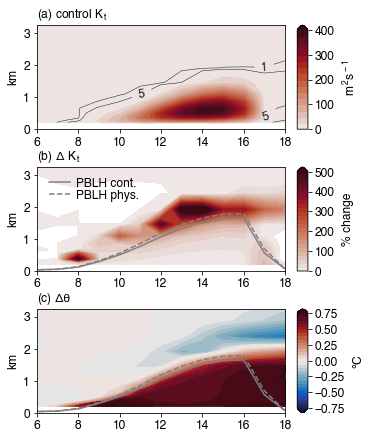

In [102]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))

levels = numpy.arange(0,401,25)
ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
contour_plot1 = ax1.contourf(xx_geopot-4, gg/9.81/1000., \
                             xkzh3d_400_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
contour_lines1 = ax1.contour(xx_geopot-4, gg/9.81/1000., \
                             xkzh3d_400_latlon_mean.T, \
                             colors='0.1', linewidths=[0.5], \
                             levels=[1,5])
clabel1 = ax1.clabel(contour_lines1, inline=1, inline_spacing=1, fontsize=fontsize, fmt='%1.0f')
ax1.set_ylim(0,3.25)
ax1.set_xlim(6,18)
ax1.set_ylabel('km', fontsize=fontsize)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([0,1,2,3])

levels = numpy.arange(0,501,20)
ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(xx_geopot-4, gg/9.81/1000., \
                             (xkzh3d_diffs_latlon_mean.T/xkzh3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax2.set_ylim(0,3.25)
ax2.set_xlim(6,18)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([0,1,2,3])
ax2.set_ylabel('km', fontsize=fontsize)
ax2.plot(xx_geopot[0,:]-4, pblh_400_latlon_mean/1000., c='0.5', label='PBLH cont.')
ax2.plot(xx_geopot[0,:]-4, pblh_1000_latlon_mean/1000., c='0.5', ls='--', label='PBLH phys.')

ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)
levels = numpy.arange(-.75,.751,0.05)
contour_plot3 = ax3.contourf(xx_geopot-4, gg/9.81/1000., \
                             t_diffs_latlon_mean.T, \
                             cmap=cmocean.cm.balance, \
                             levels=levels, \
                             extend='both')
ax3.set_ylim(0,3.25)
ax3.set_xlim(6,18)
ax3.set_ylabel('km', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([0,1,2,3])
ax3.plot(xx_geopot[0,:]-4, pblh_400_latlon_mean/1000., c='0.5')
ax3.plot(xx_geopot[0,:]-4, pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax1.text(s=r'(a) control K$_{\,t}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s=r'(b) $\Delta$ K$_{\,t}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s=r'(c) $\Delta \theta$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)


for c in contour_plot1.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot2.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot3.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)   
    
fig.tight_layout(h_pad=1.5)

ax1pos = ax1.get_position()
cbar_ax1 = fig.add_axes([ax1pos.x1+0.04, ax1pos.y0, 0.035, ax1pos.height])
cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.set_label('m$^{\,2}$s$^{\,-1}$', fontsize=fontsize, labelpad=7)
cbar1.set_ticks([i for i in range(0,401,100)])

ax2pos = ax2.get_position()
cbar_ax2 = fig.add_axes([ax2pos.x1+0.04, ax2pos.y0, 0.035, ax2pos.height])
cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_label('% change', fontsize=fontsize, labelpad=7)
cbar2.set_ticks([i for i in range(0,501,100)])

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.04, ax3pos.y0, 0.035, ax3pos.height])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('$\degree$C', fontsize=fontsize, labelpad=7)
cbar3.set_ticks([i for i in numpy.arange(-0.75,0.751,0.25)])

for c in cbar_ax1.collections:
    c.set_edgecolor('face')
for c in cbar_ax2.collections:
    c.set_edgecolor('face')
for c in cbar_ax3.collections:
    c.set_edgecolor('face')

handles, labels = ax2.get_legend_handles_labels()
legend = ax2.legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(0.05,0.9), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax2.transAxes, \
                   loc='upper left', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('../figures/MAIN_fig11.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [ ]:
fontsize = 12

fig = mp.figure(figsize=(8.5,4))

levels = numpy.arange(0,401,25)
ax1 = fig.add_subplot(221)
ax1.tick_params(labelsize=fontsizxe)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             xkzh3d_400_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
contour_lines1 = ax1.contour(xx-4, pp/100., \
                             xkzh3d_400_latlon_mean.T, \
                             colors='0.1', linewidths=[0.5], \
                             levels=[1,5])
ax1.clabel(contour_lines1, inline=1, inline_spacing=1, fontsize=fontsize, fmt='%1.0f')
ax1.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax1.set_xlim(6,18)
ax1.set_ylabel('hPa', fontsize=fontsize)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])

ax3 = fig.add_subplot(223)
ax3.tick_params(labelsize=fontsize)
contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             xkzm3d_400_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
contour_lines3 = ax3.contour(xx-4, pp/100., \
                             xkzm3d_400_latlon_mean.T, \
                             colors='0.1', linewidths=[0.5], \
                             levels=[1,5])
ax3.clabel(contour_lines3, inline=1, inline_spacing=1, fontsize=fontsize, fmt='%1.0f')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) control K$_{\,t}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax3.text(s='(c) control K$_{\,m}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)



levels = numpy.arange(0,501,20)
ax2 = fig.add_subplot(222)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             (xkzh3d_diffs_latlon_mean.T/xkzh3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax2.set_ylim(1013.25,700)
ax2.set_xlim(6,18)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])

ax4 = fig.add_subplot(224)
ax4.tick_params(labelsize=fontsize)
contour_plot4 = ax4.contourf(xx-4, pp/100., \
                             (xkzm3d_diffs_latlon_mean.T/xkzm3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax4.set_ylim(1013.25,700)
ax4.set_xlim(6,18)
ax4.set_xlabel('hour', fontsize=fontsize)
ax4.set_xticks([i for i in range(6,19,2)])
ax4.set_yticks([700,800,900,1000])
ax2.text(s='(b) $\Delta$ K$_{\,t}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax4.text(s='(d) $\Delta$ K$_{\,m}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)

fig.tight_layout(h_pad=2, w_pad=8)


ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.025, ax3pos.y0, 0.0175, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('m$^{\,2}$s$^{\,-1}$', fontsize=fontsize, labelpad=7)


ax2pos = ax2.get_position()
ax4pos = ax4.get_position()
cbar_ax4 = fig.add_axes([ax4pos.x1+0.025, ax4pos.y0, 0.0175, ax2pos.y1-ax4pos.y0])
cbar4 = fig.colorbar(contour_plot4, cax=cbar_ax4)
cbar_ax4.tick_params(labelsize=fontsize)
cbar4.set_label('% change', fontsize=fontsize, labelpad=7)
cbar4.set_ticks([i for i in range(0,501,100)])

#fig.savefig('../figures/MAIN_fig11.pdf', dpi=300, bbox_inches='tight', transparent=True)




<Figure size 306x432 with 0 Axes>

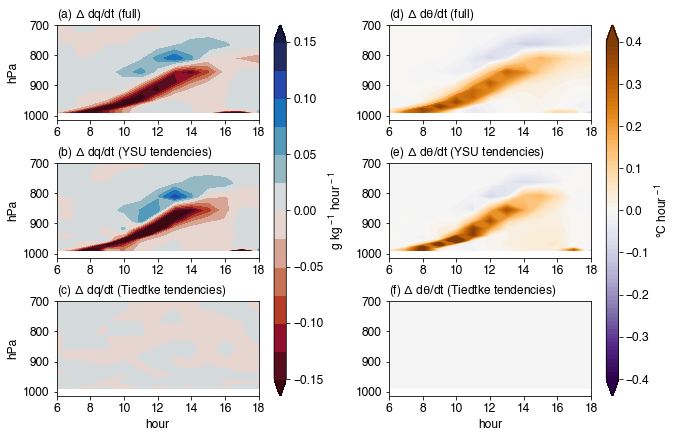

In [100]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))



fontsize = 12

fig = mp.figure(figsize=(8.5,6))


ax1 = fig.add_subplot(321)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.15,0.151,0.025)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dqdt_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)

ax2 = fig.add_subplot(323)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rqvblten_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])

ax3 = fig.add_subplot(325)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rqvcuten_diffs_latlon_mean.T*1000.*86400., \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) $\Delta$ dq/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ dq/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ dq/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)


ax12 = fig.add_subplot(322)
ax12.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.4,0.41,0.01)
contour_plot12 = ax12.contourf(xx-4, pp/100., \
                             dthetadt_diffs_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
ax12.set_ylim(1013.25,700)
ax12.set_xlim(6,18)
ax12.set_xticks([i for i in range(6,19,2)])
ax12.set_yticks([700,800,900,1000])


ax22 = fig.add_subplot(324)
ax22.tick_params(labelsize=fontsize)

contour_plot22 = ax22.contourf(xx-4, pp/100., \
                             rthblten_diffs_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
ax22.set_ylim(1013.25,700)
ax22.set_xlim(6,18)

ax22.set_xticks([i for i in range(6,19,2)])
ax22.set_yticks([700,800,900,1000])


ax32 = fig.add_subplot(326)
ax32.tick_params(labelsize=fontsize)

contour_plot32 = ax32.contourf(xx-4, pp/100., \
                             rthcuten_diffs_latlon_mean.T*861000., \
                             cmap='PuOr_r', levels=levels, extend='both')
ax32.set_ylim(1013.25,700)
ax32.set_xlim(6,18)
ax32.set_xlabel('hour', fontsize=fontsize)

ax32.set_xticks([i for i in range(6,19,2)])
ax32.set_yticks([700,800,900,1000])
ax12.text(s=r'(d) $\Delta$ d$\theta$/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax12.transAxes)
ax22.text(s=r'(e) $\Delta$ d$\theta$/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax22.transAxes)
ax32.text(s=r'(f) $\Delta$ d$\theta$/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax32.transAxes)


for c in contour_plot1.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot2.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot3.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot12.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot22.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot32.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)

fig.tight_layout(w_pad=9, h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.025, ax3pos.y0, 0.02, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('g kg$^{\,-1}$ hour$^{\,-1}$', fontsize=fontsize)
#cbar3.set_ticks([-.01,0,.01])

for c in cbar_ax3.collections:
    c.set_edgecolor('face')

ax12pos = ax12.get_position()
ax32pos = ax32.get_position()
cbar_ax32 = fig.add_axes([ax32pos.x1+0.025, ax32pos.y0, 0.02, ax12pos.y1-ax32pos.y0])
cbar32 = fig.colorbar(contour_plot32, cax=cbar_ax32)
cbar_ax32.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar32.set_label('$\degree$C hour$^{\,-1}$', fontsize=fontsize)
cbar32.set_ticks([-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5])

for c in cbar_ax32.collections:
    c.set_edgecolor('face')

fig.savefig('../figures/SI_fig06.pdf', dpi=300, bbox_inches='tight', transparent=True)